In [1]:
%matplotlib inline
import mpld3
mpld3.disable_notebook()

%load_ext autoreload

In [3]:
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history
from rotation_rate_utils import plot_layerwise_angle_deviation_curves

/home/sicarbonnell/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [29]:
with open('results.p','rb') as f:
    results = pickle.load(f)

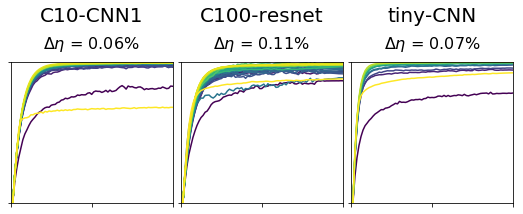

In [31]:
matplotlib.rcParams.update({'font.size': 15})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN']
ref_performances = {'C10-CNN1':0.8845,'C100-resnet':0.5981,'tiny-CNN':0.5089}
f, axes = plt.subplots(1,len(tasks), figsize = (3*len(tasks),2.6))
axes = np.array([axes])
for i,task in enumerate(tasks):
    plot_layerwise_angle_deviation_curves(results[task]['LARS']['ladc'], ax = axes[0,i])
    
    ref_performance = ref_performances[task]
    axes[0,i].set_title('$\Delta \eta$ = '+str(round((results[task]['LARS']['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    
    axes[0,i].set_xlim([0,80])
    axes[0,i].set_xticks([0,40,80])
    axes[0,i].set_ylim([0,1])
    axes[0,i].set_yticks([0,1])
    
    axes[0,i].set_ylabel('')
    axes[0,i].set_yticklabels('')
    axes[0,i].set_xlabel('')
    axes[0,i].set_xticklabels('')
    
    pad = 40
    size = 20
    axes[0,i].annotate(task, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')
plt.subplots_adjust(hspace=0.35,wspace=0.05)
plt.savefig('figures/LARS_analysis.png',format='png', dpi=200, bbox_inches="tight")
